In [1]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt

In [2]:
counts = pd.read_csv("all_identified_predicted_RNAs.csv", sep=",")

In [3]:
known_piRNA_count = np.array(counts[:1244].sum())[1:].reshape(3,3)
known_miRNA_count = np.array(counts[1244:1577].sum())[1:].reshape(3,3)
pred_miRNA_count = np.array(counts[1577:1916].sum())[1:].reshape(3,3)
pred_piRNA_count = np.array(counts[1916:].sum())[1:].reshape(3,3)

In [4]:
mapped_counts = np.array([25641386,13845916,24387558,18942403,23785957,25014590,20861794,17270985,21713125]).reshape(3,3)

In [5]:
# 
perc_known_piRNAs = known_piRNA_count / mapped_counts * 100
perc_known_miRNAs = known_miRNA_count / mapped_counts * 100
perc_pred_piRNAs = pred_piRNA_count / mapped_counts * 100
perc_pred_miRNAs = pred_miRNA_count / mapped_counts * 100
unidentified = (mapped_counts - (known_miRNA_count + known_piRNA_count + pred_piRNA_count + pred_miRNA_count))/mapped_counts *100
values = [perc_known_piRNAs,
          perc_known_miRNAs,
          perc_pred_piRNAs,
          perc_pred_miRNAs,
          unidentified]

In [6]:
weights = (mapped_counts.reshape(3,3) / mapped_counts.reshape(3,3).sum(axis=1)[:,None])
print(weights)

[[0.40143158 0.21676628 0.38180214]
 [0.27962176 0.35112077 0.36925747]
 [0.34859184 0.28859093 0.36281723]]


In [7]:
# calculating weighted means
known_piRNAs_weighted_mean_percentage = (weights * perc_known_piRNAs).sum(axis=1)
known_miRNAs_weighted_mean_percentage = (weights * perc_known_miRNAs).sum(axis=1)
pred_piRNAs_weighted_mean_percentage = (weights * perc_pred_piRNAs).sum(axis=1)
pred_miRNAs_weighted_mean_percentage = (weights * perc_pred_miRNAs).sum(axis=1)
unidentified_weighted_mean_percentage = (weights * unidentified).sum(axis=1)
means = [known_piRNAs_weighted_mean_percentage,
         known_miRNAs_weighted_mean_percentage,
         pred_piRNAs_weighted_mean_percentage,
         pred_miRNAs_weighted_mean_percentage,
         unidentified_weighted_mean_percentage]

In [8]:
# calculating weighted standard deviation 
stdws = []
for value, mean in zip(values,means):
    numerator = (weights *(value - mean[:,None])**2).sum(axis=1)
    delimitor = weights.sum(axis=1) * (3-1)/3
    stdw = np.sqrt((numerator / delimitor).astype(float))
    stdws.append(stdw)

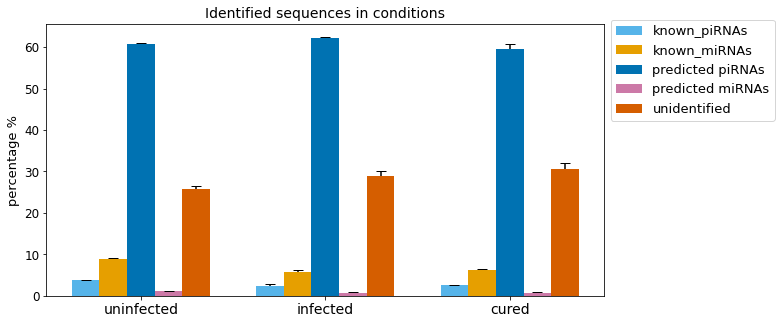

In [9]:

labels = ["known_piRNAs", "known_miRNAs", "predicted piRNAs", "predicted miRNAs", "unidentified"]
colors = ["#56B4E9", "#E69F00", "#0072B2", "#CC79A7", "#D55E00"]
distance = [-0.3, -0.15, 0, 0.15, 0.3]

fig, ax = plt.subplots(figsize=(10,5))
x = np.arange(3)
width=0.15

for i, items in enumerate(zip(labels,colors,distance)):
    ax.bar(x+items[2], means[i],width, label=items[0], color=items[1])
    plotline, caplines, barlinecols = ax.errorbar(x+items[2], 
                                                 means[i], 
                                                 yerr=stdws[i],lolims=True,capsize=0,ls="None", color="k")
    caplines[0].set_marker("_")
    caplines[0].set_markersize(10)
ax.set_xticks(x, ["uninfected", "infected", "cured"], fontsize=14)
ax.tick_params(axis='y', which='major', labelsize=12)
ax.set_ylabel("percentage %", fontsize=13)
ax.legend(loc="center left",bbox_to_anchor=(1,0.83),fontsize=13)
ax.set_title("Identified sequences in conditions", fontsize=14)
plt.savefig("identified_sequences_weighted.png", dpi=300, format="png", transparent=True, bbox_inches='tight')